In [2]:
%matplotlib inline

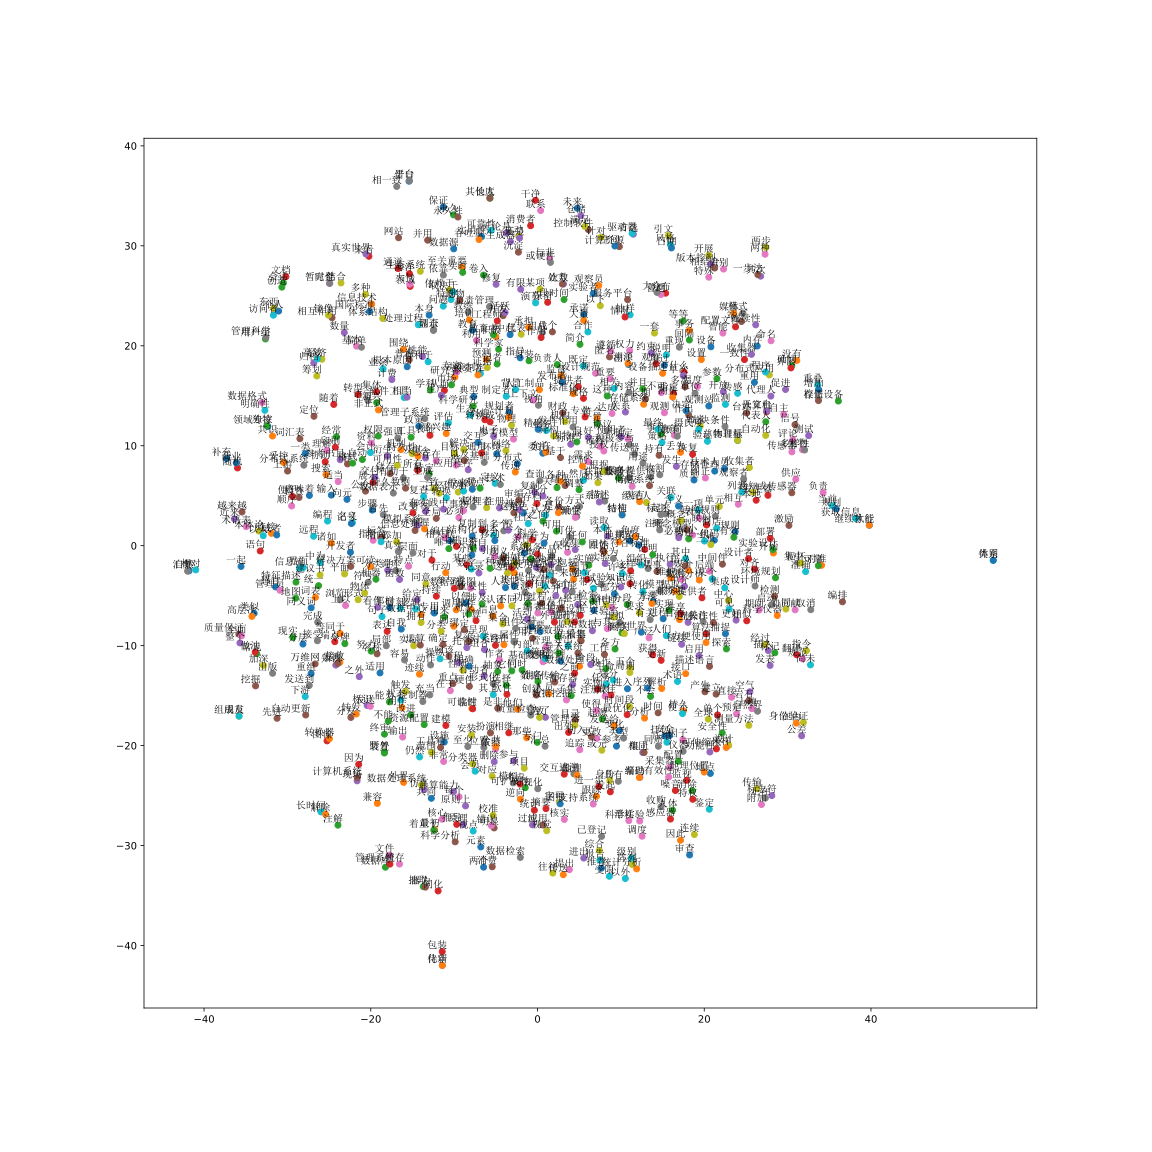

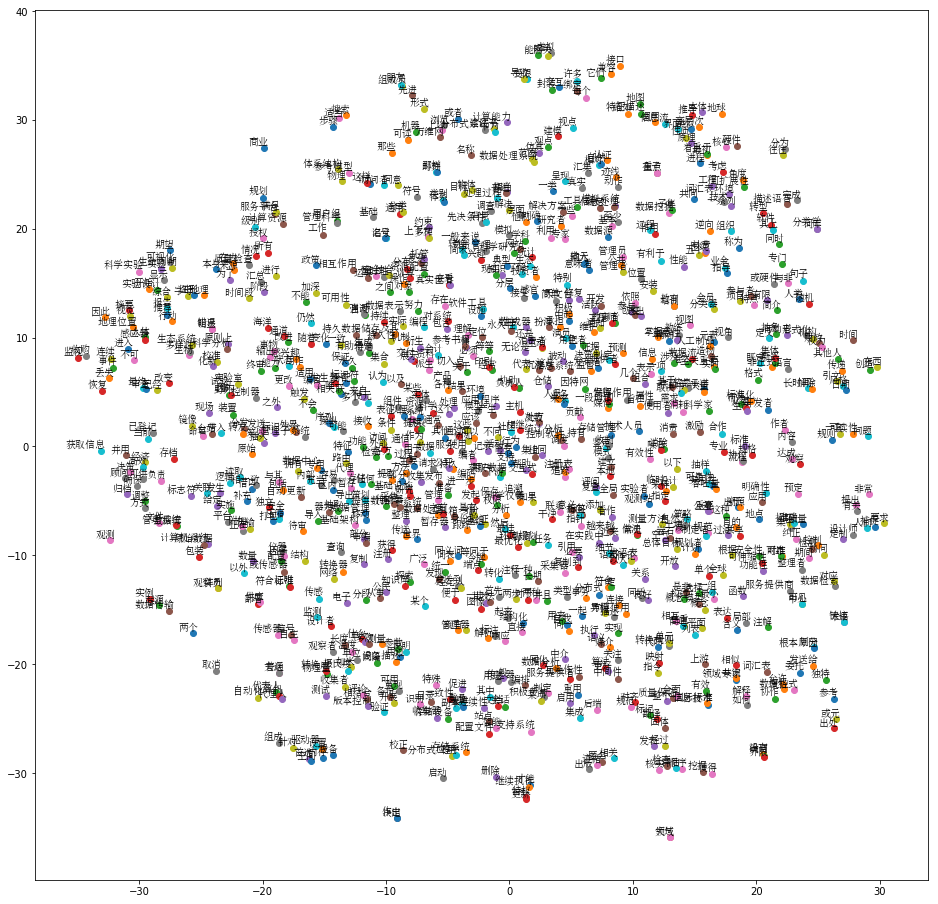

In [4]:
#coding:utf-8
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.font_manager import FontProperties

from IPython.core.display import SVG


font = FontProperties(fname="SimSun.ttf",size=10)
##########################################################
#plot by using tSNE
def display_closestwords_tsnescatterplot(model, word):    
    arr = np.empty((0,10), dtype='f')
    word_labels = [word]
    # get close words
    close_words = model.similar_by_word(word)    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    #plt.show()
    plt.savefig('whole.svg')


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        #print(word)
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                    fontproperties = font)
    #plt.show()
    #plt.savefig('whole.svg')


text_file_name = 'zhENVRILarge.txt'
sentences = gensim.models.word2vec.LineSentence(text_file_name)
#print(sentences)
simple_model = gensim.models.Word2Vec(sentences, size=10, window=5,min_count=2, workers=2)
tsne_plot(simple_model)


SVG(filename='whole.svg')
